<a href="https://colab.research.google.com/github/jjieun1212/basic_project/blob/main/DS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mechanize
import mechanize
import http.cookiejar
import time
import re

cj = http.cookiejar.CookieJar()
br = mechanize.Browser()
br.set_cookiejar(cj)

data_points = []

for year in range(2019, 2024):
    for month in range(1, 13):
        url = f"https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy={year}&mm={month}&obs=1"
        print("Fetching data...", url)

        br.open(url)
        data = br.response().read().decode("utf-8")

        x = re.findall(r'최저기온:\s*(-?\d+\.\d+)', data)
        y = re.findall(r'최고기온:\s*(-?\d+\.\d+)', data)

        for low, high in zip(x, y):
            data_points.append((float(low), float(high)))

        if len(data_points) >= 1000:
            break

        time.sleep(1)

    if len(data_points) >= 1000:
        break

print(len(data_points))  # 데이터 수 출력
print("샘플 데이터 5개:", data_points[:5])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 8.0 MB/s eta 0:00:00
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=1&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=2&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=3&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=4&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=5&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=6&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=7&obs=1
Fetching data... https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy=2019&mm=8&obs=1
Fetching data... https:/

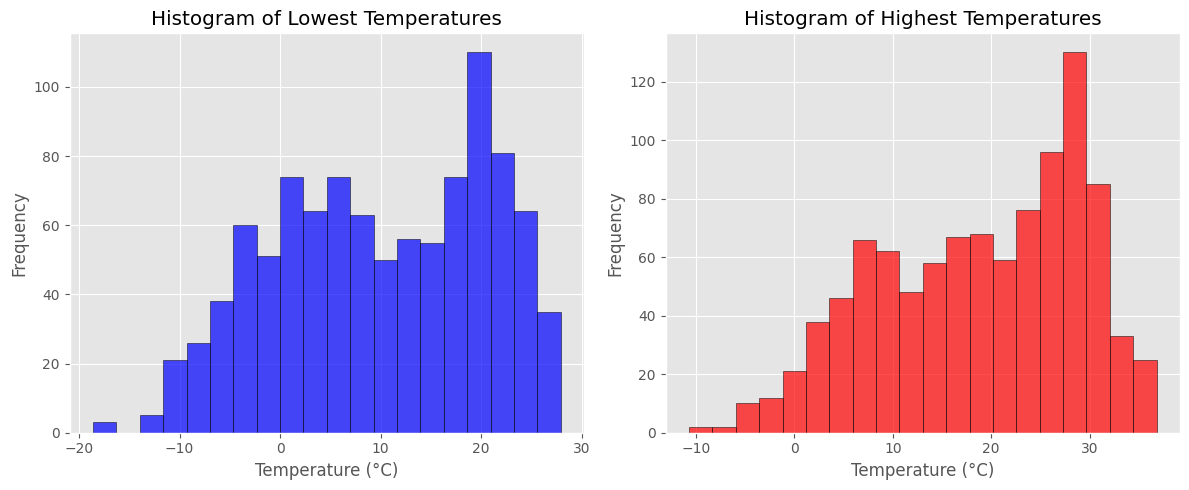

In [ ]:
import matplotlib.pyplot as plt

low_temps = [temp[0] for temp in data_points]
high_temps = [temp[1] for temp in data_points]

plt.style.use("ggplot")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(low_temps, bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title("Histogram of Lowest Temperatures")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")

axes[1].hist(high_temps, bins=20, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title("Histogram of Highest Temperatures")
axes[1].set_xlabel("Temperature (°C)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

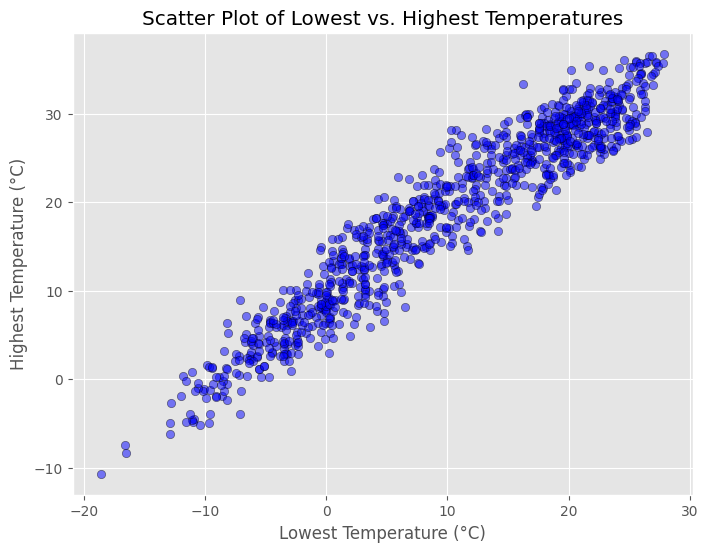

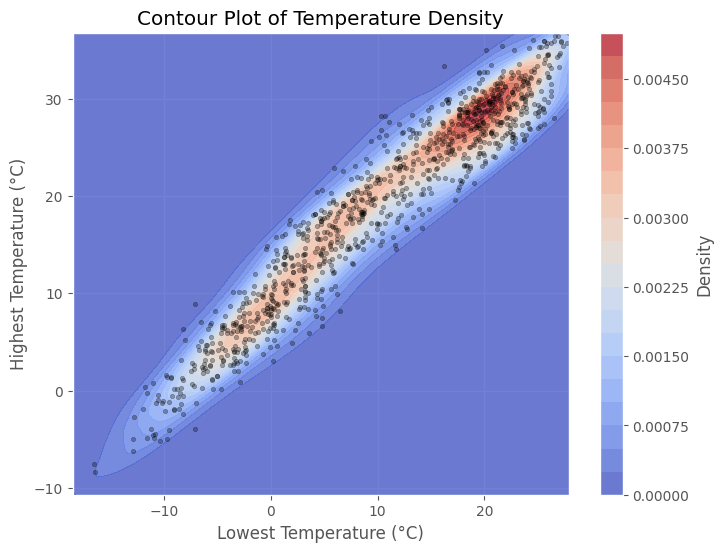

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde

low_temps = np.array(low_temps)
high_temps = np.array(high_temps)

# 산점도
plt.figure(figsize=(8, 6))
plt.scatter(low_temps, high_temps, alpha=0.5, color="blue", edgecolor="black")
plt.title("Scatter Plot of Lowest vs. Highest Temperatures")
plt.xlabel("Lowest Temperature (°C)")
plt.ylabel("Highest Temperature (°C)")
plt.grid(True)
plt.show()

# 등고선
xy = np.vstack([low_temps, high_temps])
kde = gaussian_kde(xy)

xgrid = np.linspace(min(low_temps), max(low_temps), 100)
ygrid = np.linspace(min(high_temps), max(high_temps), 100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=20, cmap="coolwarm", alpha=0.75)
plt.colorbar(label="Density")
plt.scatter(low_temps, high_temps, alpha=0.3, color="black", s=10)
plt.title("Contour Plot of Temperature Density")
plt.xlabel("Lowest Temperature (°C)")
plt.ylabel("Highest Temperature (°C)")
plt.grid(True)
plt.show()

In [ ]:
# 평균
def mean(arr):
    return sum(arr) / len(arr)

# 중앙값
def median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

# 표준편차
def std_dev(arr):
    m = mean(arr)
    variance = sum((x - m) ** 2 for x in arr) / (len(arr) - 1)
    return variance ** 0.5

# 사분위수
def quartile(arr, q):
    sorted_arr = sorted(arr)
    pos = q * (len(sorted_arr) + 1) - 1
    if pos.is_integer():
        return sorted_arr[int(pos)]
    else:
        lower = sorted_arr[int(pos)]
        upper = sorted_arr[int(pos) + 1]
        frac = pos - int(pos)
        return lower + (upper - lower) * frac

# IQR
def iqr(arr):
    return quartile(arr, 0.75) - quartile(arr, 0.25)

# 결과 출력
def print_stats(name, arr):
    print(f"{name} 통계:")
    print(f"  Mean: {mean(arr):.2f}")
    print(f"  Median: {median(arr):.2f}")
    print(f"  Standard Deviation: {std_dev(arr):.2f}")
    q1 = quartile(arr, 0.25)
    q3 = quartile(arr, 0.75)
    print(f"  Q1 (1st Quartile): {q1:.2f}")
    print(f"  Q3 (3rd Quartile): {q3:.2f}")
    print(f"  IQR: {q3 - q1:.2f}")
    print()

# 최종 통계 출력
print_stats("최저기온", list(low_temps))
print_stats("최고기온", list(high_temps))

최저기온 통계:
  Mean: 9.94
  Median: 10.20
  Standard Deviation: 10.47
  Q1 (1st Quartile): 1.30
  Q3 (3rd Quartile): 19.50
  IQR: 18.20

최고기온 통계:
  Mean: 18.82
  Median: 20.20
  Standard Deviation: 10.18
  Q1 (1st Quartile): 10.20
  Q3 (3rd Quartile): 27.50
  IQR: 17.30



In [ ]:
def skewness(arr):
    n = len(arr)
    mean_val = mean(arr)
    std_val = std_dev(arr)
    return (n / ((n - 1) * (n - 2))) * sum(((x - mean_val) / std_val) ** 3 for x in arr)

def kurtosis(arr):
    n = len(arr)
    mean_val = mean(arr)
    std_val = std_dev(arr)
    sum4 = sum(((x - mean_val) / std_val) ** 4 for x in arr)
    numerator = n * (n + 1) * sum4
    denominator = (n - 1) * (n - 2) * (n - 3)
    correction = (3 * (n - 1)**2) / ((n - 2) * (n - 3))
    return (numerator / denominator) - correction

print(f"📊 최저기온 skewness: {skewness(low_temps):.4f}")
print(f"📊 최고기온 skewness: {skewness(high_temps):.4f}")
print(f"📈 최저기온 kurtosis: {kurtosis(low_temps):.4f}")
print(f"📈 최고기온 kurtosis: {kurtosis(high_temps):.4f}")


📊 최저기온 skewness: -0.2210
📊 최고기온 skewness: -0.3974
📈 최저기온 kurtosis: -1.0563
📈 최고기온 kurtosis: -0.8593


In [ ]:
def pearson_correlation(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    denominator_x = sum((x[i] - mean_x) ** 2 for i in range(n))
    denominator_y = sum((y[i] - mean_y) ** 2 for i in range(n))

    denominator = (denominator_x * denominator_y) ** 0.5

    if denominator == 0:
        return 0  # 분모가 0이면 상관계수 계산 불가

    return numerator / denominator

correlation = pearson_correlation(low_temps, high_temps)
print(f"📈 최저기온과 최고기온의 Pearson correlation coefficient: {correlation:.4f}")


📈 최저기온과 최고기온의 Pearson correlation coefficient: 0.9591


In [ ]:
import mechanize
import http.cookiejar
import time
import re
from scipy.stats import t  # t분포에서 p-value만 구할 때 사용 (검정 함수는 아님)

# 브라우저 세팅
cj = http.cookiejar.CookieJar()
br = mechanize.Browser()
br.set_cookiejar(cj)

# 최저기온 수집 함수
def get_low_temperatures(year):
    low_temps = []
    for month in range(1, 13):
        url = f"https://www.weather.go.kr/w/observation/land/past-obs/obs-by-day.do?stn=108&yy={year}&mm={month}&obs=1"
        print(f"Fetching {year}-{month}...")
        try:
            br.open(url)
            data = br.response().read().decode("utf-8")
            temps = re.findall(r'최저기온:\s*(-?\d+\.\d+)', data)
            low_temps += [float(t) for t in temps]
            time.sleep(1)
        except:
            print(f"Failed to fetch {year}-{month}")
    return low_temps

# 데이터 수집
temps_2012 = get_low_temperatures(2012)
temps_2023 = get_low_temperatures(2023)

# 통계 계산 함수
def mean(arr):
    return sum(arr) / len(arr)

def variance(arr):
    mu = mean(arr)
    return sum((x - mu) ** 2 for x in arr) / (len(arr) - 1)

def std_dev(arr):
    return variance(arr) ** 0.5

# t-검정 수식 직접 구현
def independent_t_test(arr1, arr2):
    n1, n2 = len(arr1), len(arr2)
    mean1, mean2 = mean(arr1), mean(arr2)
    var1, var2 = variance(arr1), variance(arr2)

    # pooled standard deviation
    sp = (( (n1 - 1)*var1 + (n2 - 1)*var2 ) / (n1 + n2 - 2)) ** 0.5
    t_stat = (mean1 - mean2) / (sp * ((1/n1 + 1/n2) ** 0.5))
    df = n1 + n2 - 2  # 자유도
    return t_stat, df

# t-statistics 계산
t_stat, df = independent_t_test(temps_2012, temps_2023)

# p-value 계산 (양측검정)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# 결과 출력
print(f"✅ 2012년 평균 최저기온: {mean(temps_2012):.2f}°C")
print(f"✅ 2023년 평균 최저기온: {mean(temps_2023):.2f}°C")
print(f"✅ t-통계량: {t_stat:.4f}")
print(f"✅ 자유도: {df}")
print(f"✅ p-value: {p_value:.4f}")

# 해석
alpha = 0.05
if p_value < alpha:
    print("📌 유의수준 0.05에서 귀무가설 기각 → 두 연도의 최저기온 평균은 유의미하게 다름.")
else:
    print("📌 유의수준 0.05에서 귀무가설 채택 → 두 연도의 최저기온 평균은 통계적으로 유의미하지 않음.")


Fetching 2012-1...
Fetching 2012-2...
Fetching 2012-3...
Fetching 2012-4...
Fetching 2012-5...
Fetching 2012-6...
Fetching 2012-7...
Fetching 2012-8...
Fetching 2012-9...
Fetching 2012-10...
Fetching 2012-11...
Fetching 2012-12...
Fetching 2023-1...
Fetching 2023-2...
Fetching 2023-3...
Fetching 2023-4...
Fetching 2023-5...
Fetching 2023-6...
Fetching 2023-7...
Fetching 2023-8...
Fetching 2023-9...
Fetching 2023-10...
Fetching 2023-11...
Fetching 2023-12...
✅ 2012년 평균 최저기온: 8.49°C
✅ 2023년 평균 최저기온: 10.07°C
✅ t-통계량: -1.8887
✅ 자유도: 729
✅ p-value: 0.0593
📌 유의수준 0.05에서 귀무가설 채택 → 두 연도의 최저기온 평균은 통계적으로 유의미하지 않음.
